## Script 1

In [5]:
## Required dependecies
##%pip install plotly
##%pip install geopandas
##%pip install descartes

In [2]:
#### Parte 1. Graficar los puntos

## Paquetes necesarios

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

pio.renderers.default='browser'

import plotly.graph_objects as go
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

In [ ]:
## Data import

df = pd.read_csv('GeoLoc.txt',sep="\t")
#crs = {'init': 'epsg:4326'}
#geometry = [Point(xy) for xy in zip(df['Longitud'],df['Latitud'])]
fig = px.scatter_geo(df,lat='Latitud',lon='Longitud', hover_name="Lugar")
#fig.update_layout(title = 'World map', title_x=0.5, geo_scope = 'south america')
fig.update_geos(
    visible=False, resolution=50, scope="south america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.show()

## Cálculo de distancias

## Script 2

/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/tmp/ipykernel_8008/1439476129.py:18: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



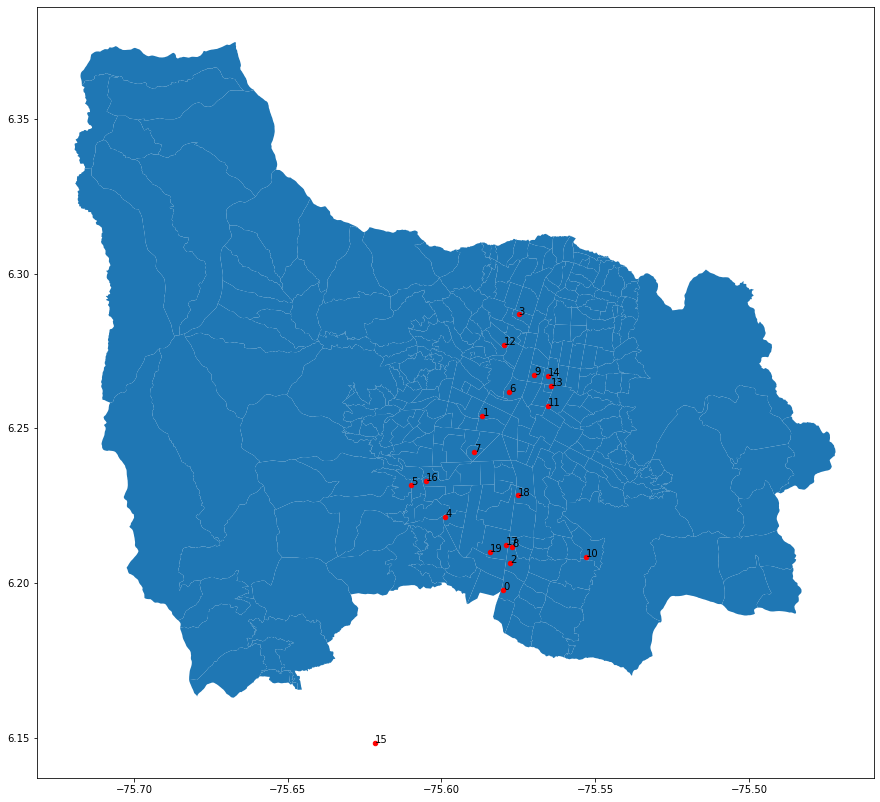

In [3]:
#### Parte 1. Graficar los puntos
## Mapa Medellín
Med = gpd.read_file('BarrioVereda_2014.shp')
fig,ax = plt.subplots(figsize = (15,15))
Med.plot(ax = ax)

## Data import
df = pd.read_csv('GeoLoc.txt',sep="\t")
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Longitud'],df['Latitud'])]

## Generate gpd_df
geo_df = gpd.GeoDataFrame(df,crs = crs, geometry = geometry)

geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "o")

for i in range(20):
    plt.annotate(s=df.iloc[i,0],xy=[df.iloc[i,2],df.iloc[i,1]])